Lab-3, Vinay Bhapkar, vvb231@nyu.edu

In [243]:
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

w1 = np.load('w1.npy')
b1 = np.load('b1.npy')
w2 = np.load('w2.npy')
b2 = np.load('b2.npy')

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [244]:
def forward_pass(x):
    z1 = np.dot(x,w1)+b1
    relu = np.maximum(z1,0)
    z2 = np.dot(relu,w2)+b2
    y_hat = np.exp(z2)/np.sum(np.exp(z2))
    
    return y_hat,relu    

def relu_der(relu):
    dr = relu
    dr[relu<=0] = 0
    dr[relu > 0] = 1 
    return dr

def grad_x(x,y):
    y_hat,relu = forward_pass(x)
    delta3 = y_hat - y
    delta2 = np.dot(w2,delta3)*relu_der(relu)
    dldx = np.dot(w1, delta2)
    
    return dldx, y_hat

def update_x(x,dldx,lr):
    x = x - lr*dldx
    return x

def loss(y,y_hat):
    loss = np.mean((y-y_hat)**2)
    return loss

def one_hot_y(i):
    y = np.zeros(10,)
    y[i]=1
    return y

In [245]:
x_random = np.random.random_integers(0, 255, (784,))/255

x_avg = mnist.train.images.mean(0)

x_mean = []
for i in range(10):
    labels = np.where(mnist.train.labels==i)[0]
    x = mnist.train.images[labels].mean(0)
    x_mean.append(x)
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 255 + 1) instead
  """Entry point for launching an IPython kernel.


In [246]:
import matplotlib.pyplot as plt
%matplotlib inline

In [247]:
from textwrap import wrap
def recover_img(x_input, y_input):
    x1 = x_input
    y = one_hot_y(y_input)
    
   
    

    
    for i in range(10500):
    
        dldx, y_hat = grad_x(x1,y)
        loss = np.mean((y - y_hat)**2)
        x2 = update_x(x1,dldx,0.01)
        y_hat1,_ = forward_pass(x2)
        loss1 = np.mean((y - y_hat1)**2)
        if loss1 >= loss:
            print('final loss:',loss1)
            break
        elif loss1 < loss:
            
            x1 = x2
            #if i%5000 == 0:
                #print('iteration:{}, loss :{}, loss_reduce = {}'.format(i,loss1,loss-loss1))
    
    RMSE,RMSE_argmin = np.min(((mnist.train.images- x1)**2).mean(1)), np.argmin(((mnist.train.images- x1)**2).mean(1))
    
    #plt.title(print('RMSE: {}, min RMSE image index for recovered image in train data: {}'.format(RMSE, RMSE_argmin)))
    
    plt.subplots_adjust(wspace=0.75)
    fig = plt.figure(figsize=(15,10),dpi=80)
    fig.tight_layout()
    fig.subplots_adjust(top=0.8)
    
    plt.subplot(131)
    plt.imshow(x_input.reshape(28,28),cmap='gray')
    plt.title('input image for {}'.format(y_input))
    
    
    plt.subplot(132)
    #print('RMSE: {}, min RMSE image index for recovered image in train data: {}'.format(RMSE, RMSE_argmin))
    plt.imshow(np.reshape(x1,(28,28)),cmap='gray')
    #plt.title('Recovered img for{0:1d},RMSE={0:2f}'.format(y_input,RMSE))
    plt.title('Recovered img for {:0.0f},RMSE={:0.3f}'.format(y_input,RMSE))
    
    
    plt.subplot(133)
    plt.imshow(mnist.train.images[RMSE_argmin].reshape(28,28),cmap='gray')
    plt.title('min RMSE image,index={}'.format(RMSE_argmin))
    

<Figure size 432x288 with 0 Axes>

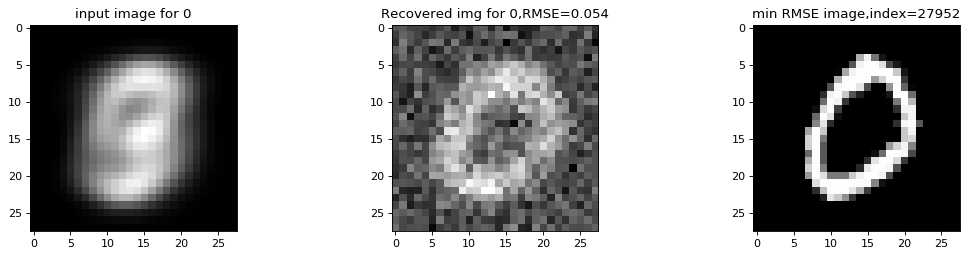

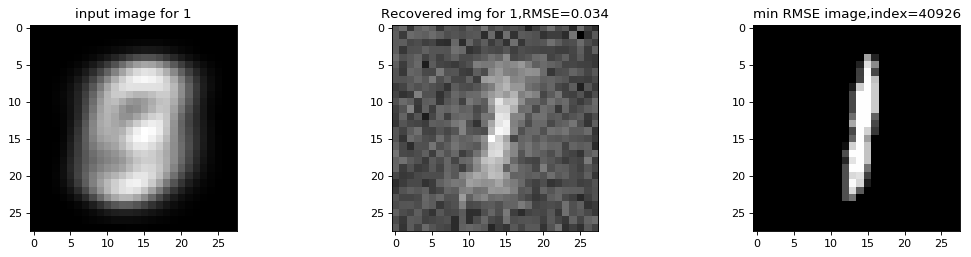

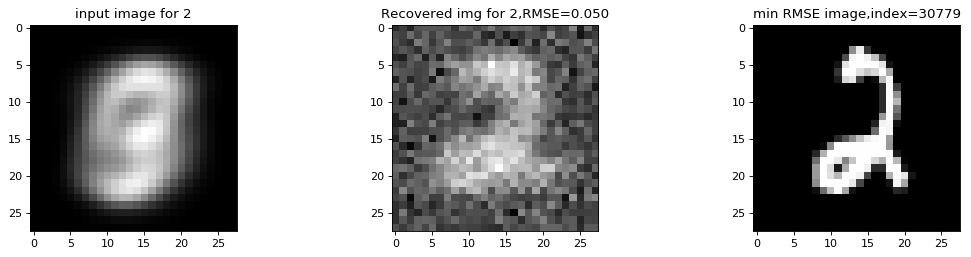

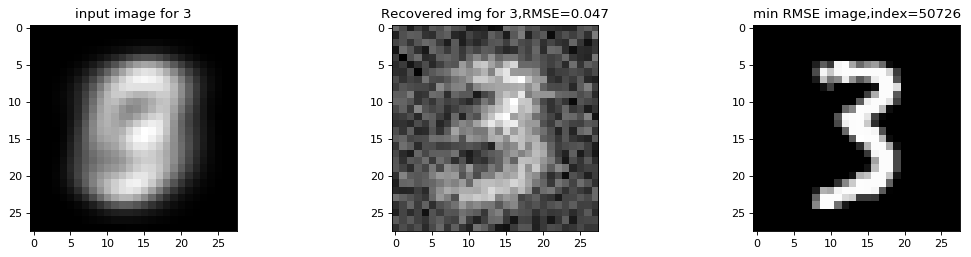

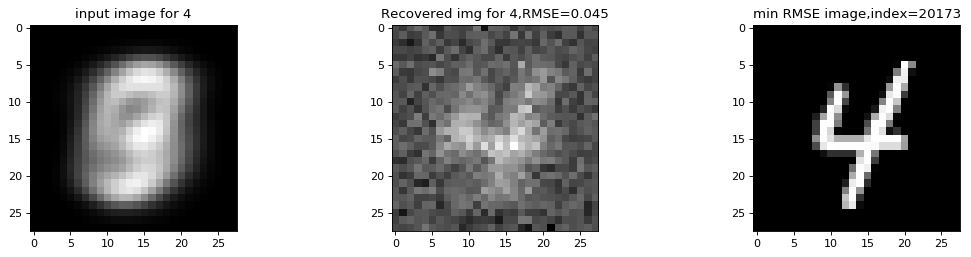

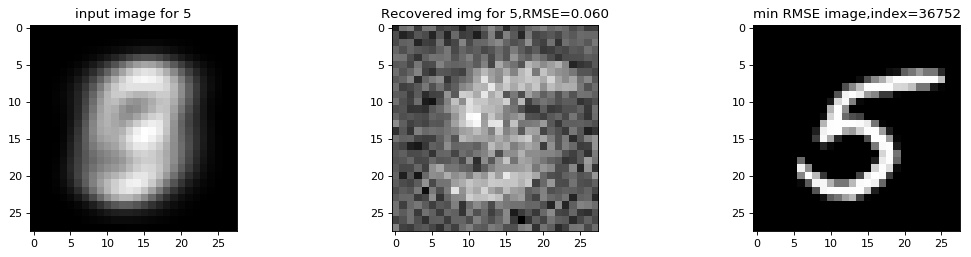

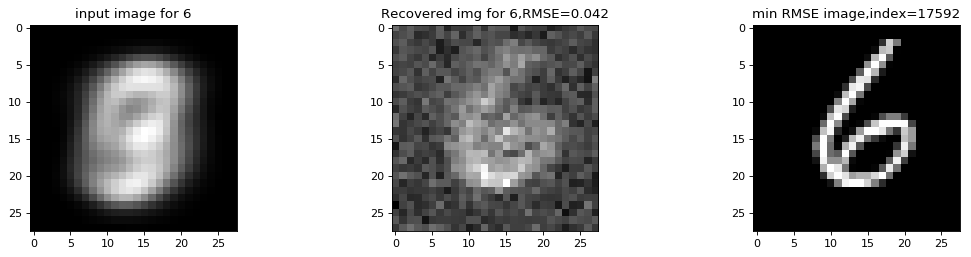

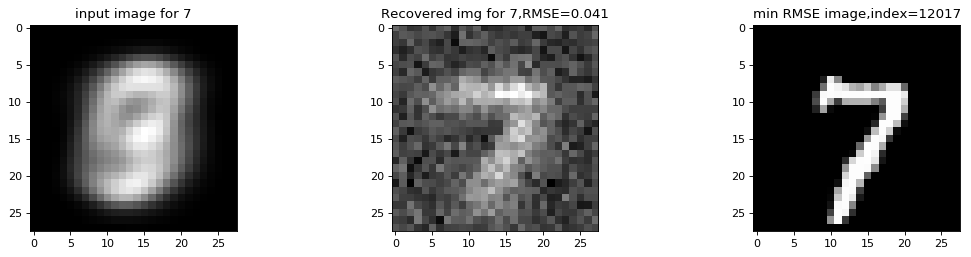

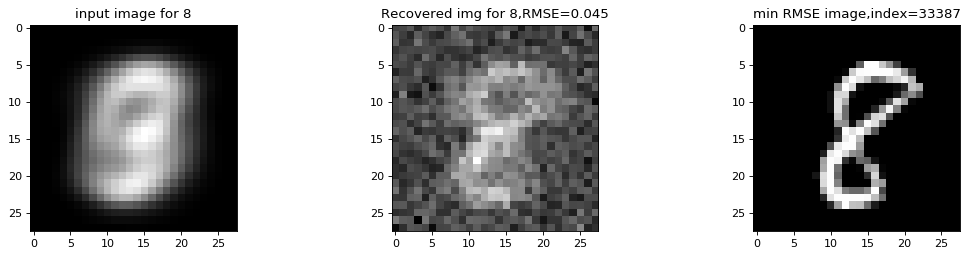

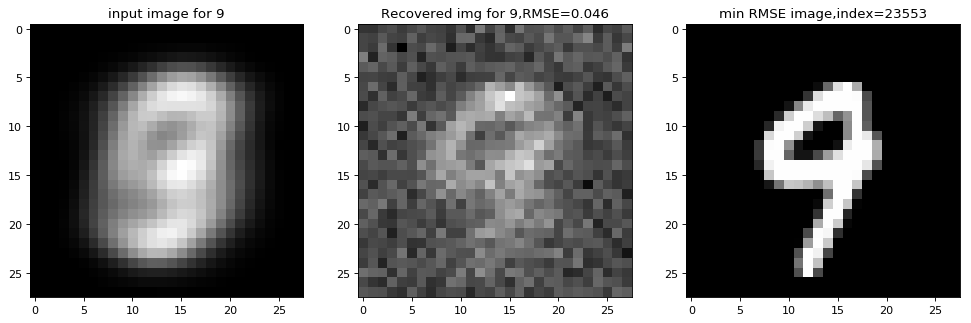

In [132]:
for i in range(10):
    recover_img(x_avg,i)

<Figure size 432x288 with 0 Axes>

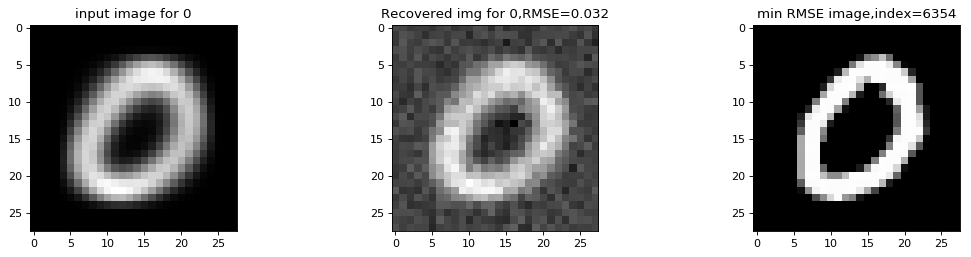

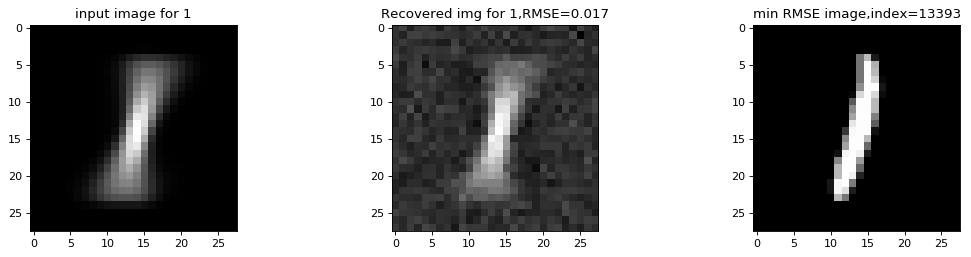

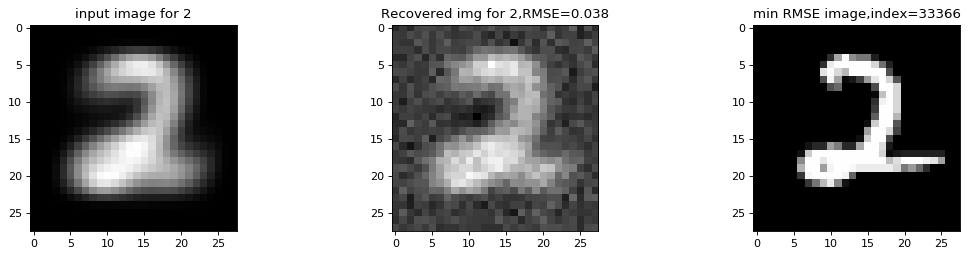

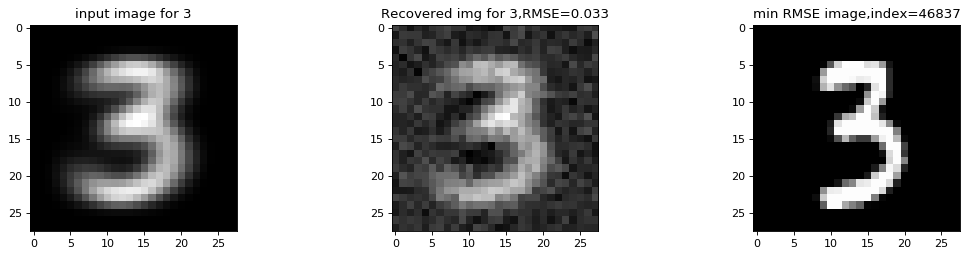

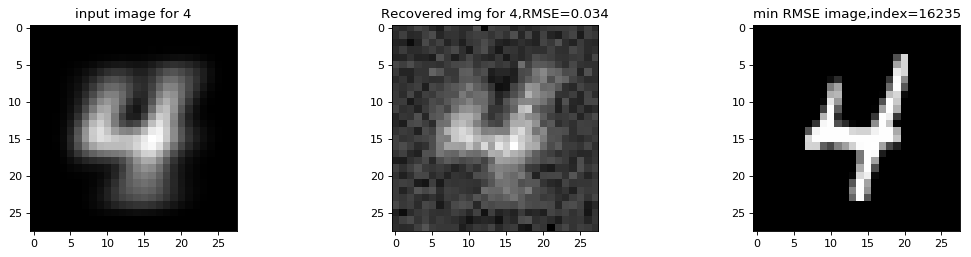

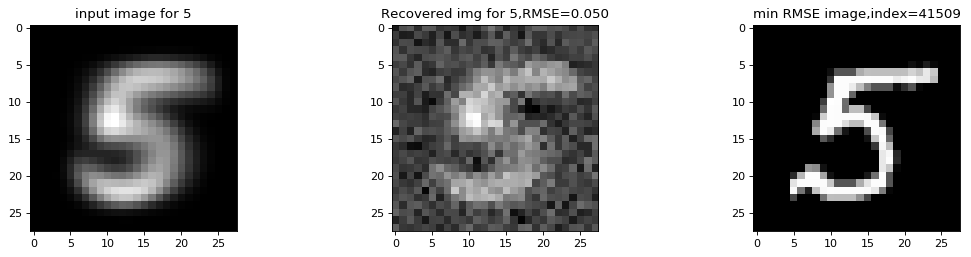

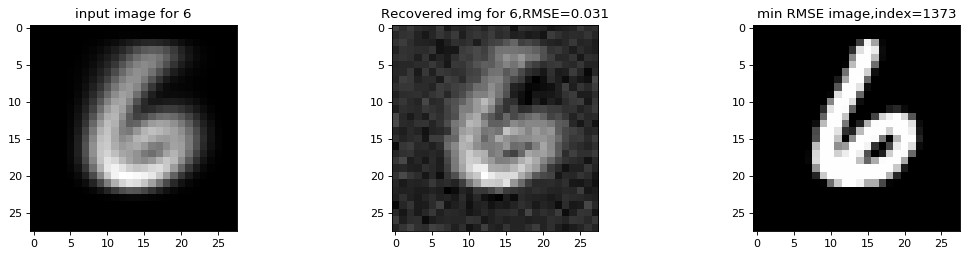

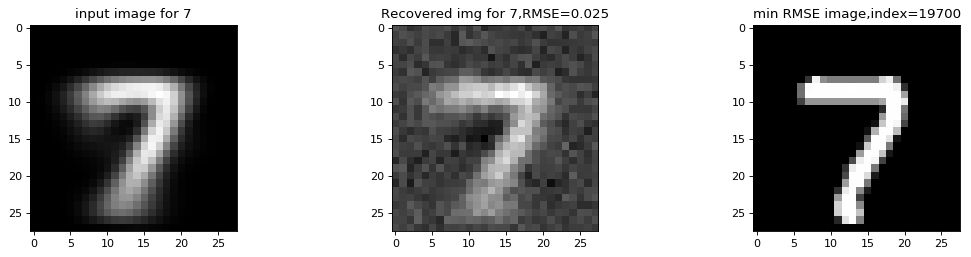

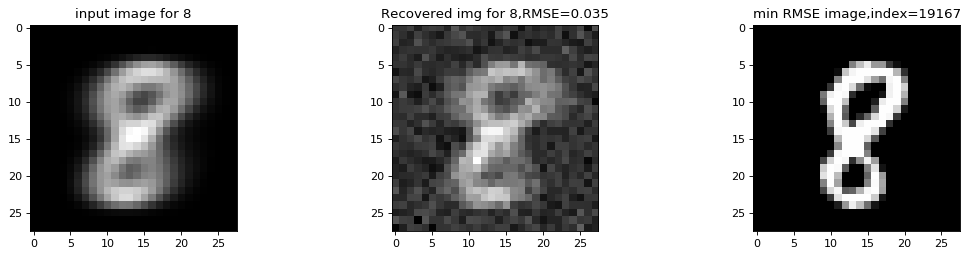

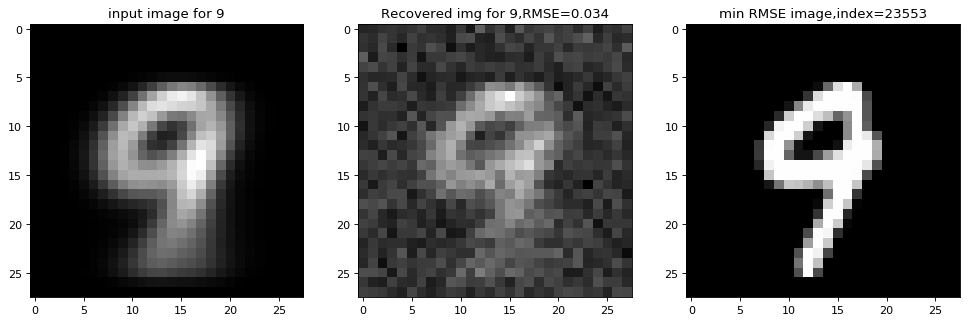

In [133]:
for i in range(10):
    recover_img(x_mean[i],i)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 255 + 1) instead
  


<Figure size 432x288 with 0 Axes>

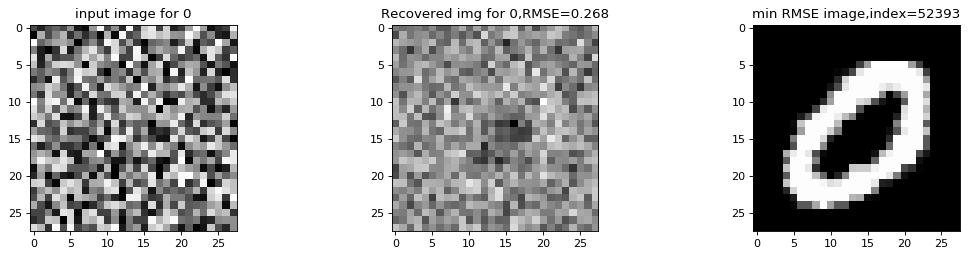

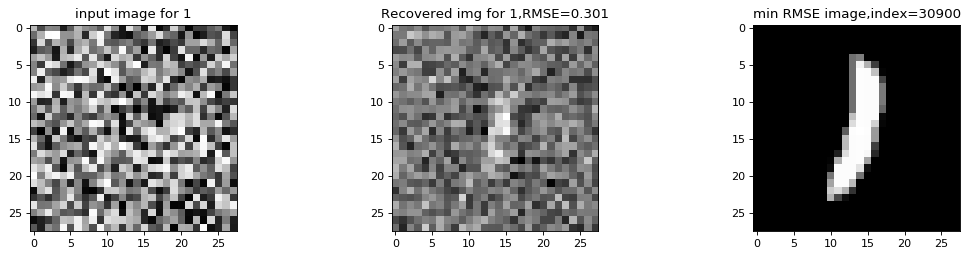

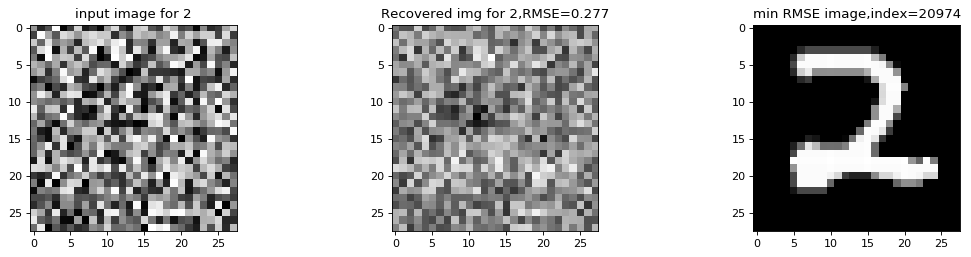

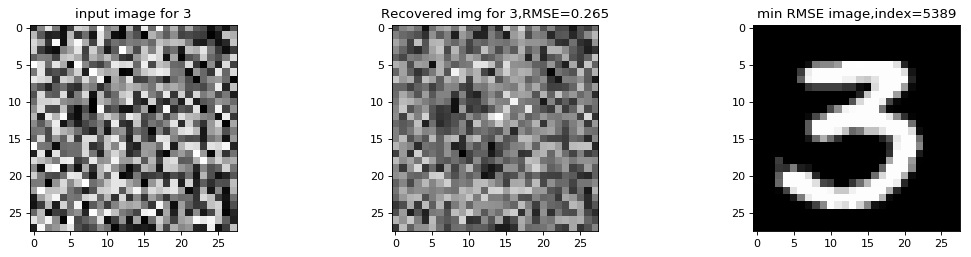

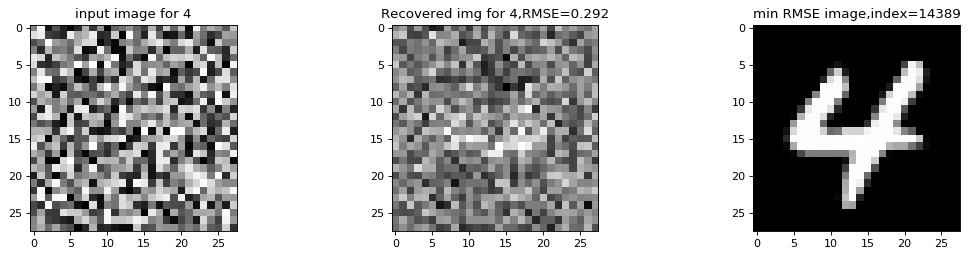

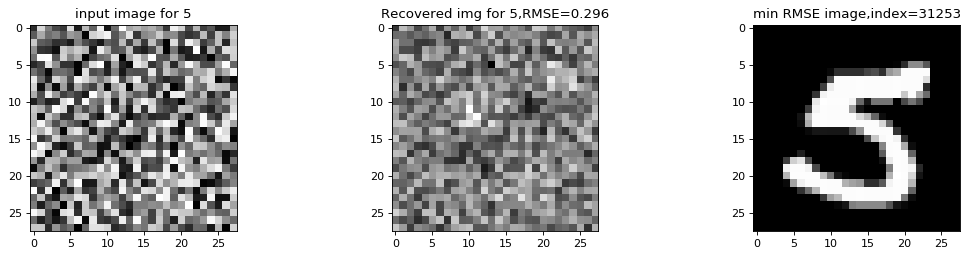

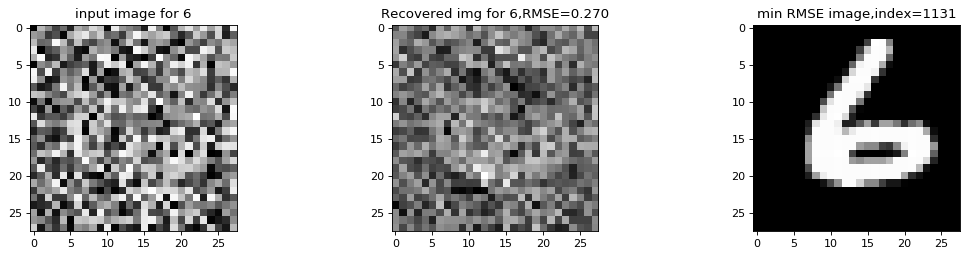

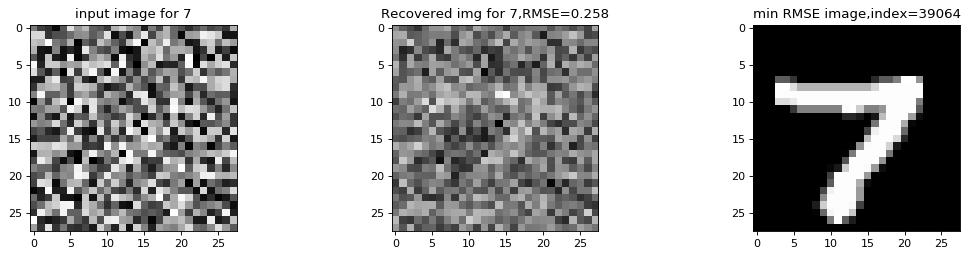

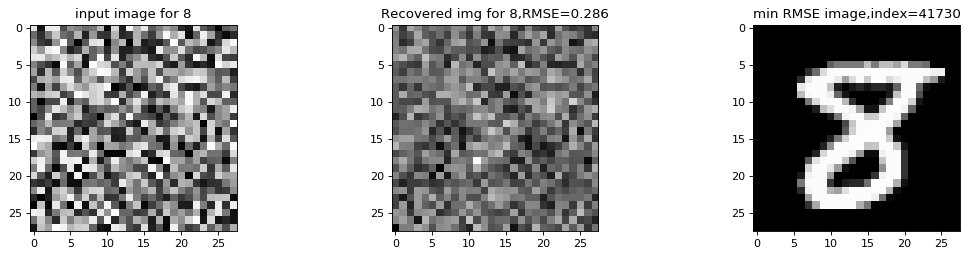

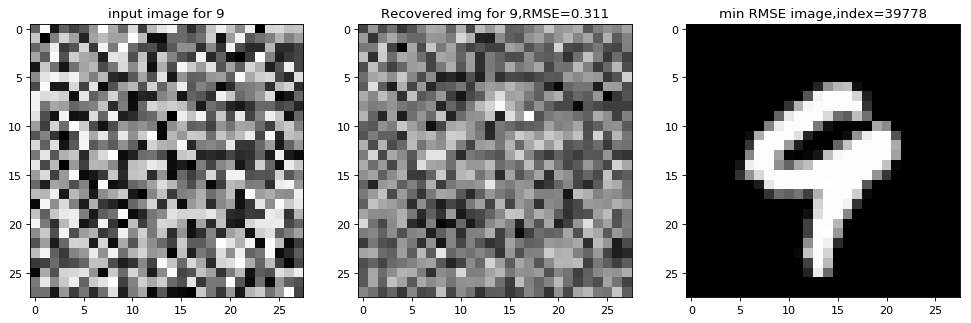

In [134]:
for i in range(10):
    x_random = np.random.random_integers(0, 255, (784,))/255
    recover_img(x_random,i)

In [248]:
from tensorflow.examples.tutorials.mnist import input_data
mnist1 = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [204]:
w1 = np.load('w1.npy')
w2 = np.load('w2.npy')

y_pred = []
for i in mnist.test.images[:3000]:
    y_hat,_ = forward_pass(i)
    y_pred.append(y_hat)
    
acc = np.mean(np.argmax(mnist.test.labels[:3000],axis=1)==np.argmax(y_pred,axis =1))
print('Accuracy on actual weights= {:0.4f}'.format(acc))


Accuracy on actual weights= 0.8343


In [249]:
a = np.array([0.01,0.1,0.5,1])

scale_w1 = a*np.std(w1)
scale_w2 = a*np.std(w2)

In [207]:

w1 = np.load('w1.npy')
w2 = np.load('w2.npy')


lamdaw1 = scale_w1[0]
lamdaw2 = scale_w2[0]

w1l1 = np.random.laplace(loc=0, scale=lamdaw1,size=w1.shape)
w2l1 = np.random.laplace(loc=0, scale=lamdaw2,size=w2.shape)

w1 = w1 + w1l1
w2 = w2 + w2l1

y_pred = []
for i in mnist.test.images[:3000]:
    y_hat,_ = forward_pass(i)
    y_pred.append(y_hat)
    
acc = np.mean(np.argmax(mnist.test.labels[:3000],axis=1)==np.argmax(y_pred,axis =1))
print('Accuracy={:0.4f},a={}'.format(acc,a[0]))

#RMSE,RMSE_argmin = np.min(((mnist.train.images- x1)**2).mean(1)), np.argmin(((mnist.train.images- x1)**2).mean(1))



Accuracy=0.8340,a=0.01


In [171]:
w1 = np.load('w1.npy')
w2 = np.load('w2.npy')

lamdaw1 = scale_w1[1]
lamdaw2 = scale_w2[1]

w1l1 = np.random.laplace(loc=0, scale=lamdaw1,size=w1.shape)
w2l1 = np.random.laplace(loc=0, scale=lamdaw2,size=w2.shape)

w1 = w1 + w1l1
w2 = w2 + w2l1

y_pred = []
for i in mnist.test.images[:3000]:
    y_hat,_ = forward_pass(i)
    y_pred.append(y_hat)
    
acc = np.mean(np.argmax(mnist.test.labels[:3000],axis=1)==np.argmax(y_pred,axis =1))
print('Accuracy= {:0.4f},a={}'.format(acc,a[1]))

Accuracy= 0.8290,a=0.1


In [172]:
w1 = np.load('w1.npy')
w2 = np.load('w2.npy')

lamdaw1 = scale_w1[2]
lamdaw2 = scale_w2[2]

w1l1 = np.random.laplace(loc=0, scale=lamdaw1,size=w1.shape)
w2l1 = np.random.laplace(loc=0, scale=lamdaw2,size=w2.shape)

w1 = w1 + w1l1
w2 = w2 + w2l1

y_pred = []
for i in mnist.test.images[:3000]:
    y_hat,_ = forward_pass(i)
    y_pred.append(y_hat)
    
acc = np.mean(np.argmax(mnist.test.labels[:3000],axis=1)==np.argmax(y_pred,axis =1))
print('Accuracy= {:0.4f},a={}'.format(acc,a[2]))

Accuracy= 0.7890,a=0.5


In [173]:
w1 = np.load('w1.npy')
w2 = np.load('w2.npy')

lamdaw1 = scale_w1[3]
lamdaw2 = scale_w2[3]

w1l1 = np.random.laplace(loc=0, scale=lamdaw1,size=w1.shape)
w2l1 = np.random.laplace(loc=0, scale=lamdaw2,size=w2.shape)

w1 = w1 + w1l1
w2 = w2 + w2l1

y_pred = []
for i in mnist.test.images[:3000]:
    y_hat,_ = forward_pass(i)
    y_pred.append(y_hat)
    
acc = np.mean(np.argmax(mnist.test.labels[:3000],axis=1)==np.argmax(y_pred,axis =1))
print('Accuracy= {:0.4f},a={}'.format(acc,a[3]))

Accuracy= 0.5977,a=1.0


In [255]:

def recover_img_lp(x_input, y_input,i):
    #a = np.array([0.01,0.1,0.5,1])
    w1 = np.load('w1.npy')
    w2 = np.load('w2.npy')


    lamdaw1 = scale_w1[i]
    lamdaw2 = scale_w2[i]
    print('a:',a[i])

    w1l1 = np.random.laplace(loc=0, scale=lamdaw1,size=w1.shape)
    w2l1 = np.random.laplace(loc=0, scale=lamdaw2,size=w2.shape)

    w1 = w1 + w1l1
    w2 = w2 + w2l1
    
    
    
    
    
    y_pred = []
    for i in mnist1.test.images[:3000]:
        y_hat,_ = forward_pass(i)
        y_pred.append(y_hat)
    
    acc = np.mean(np.argmax(mnist1.test.labels[:3000],axis=1)==np.argmax(y_pred,axis =1))
    #print('Accuracy= {},a={}'.format(acc,a[i]))
    #print('a=',a[i])
    print('Accuracy=',acc)
    
    
    
    x1 = x_input
    y = one_hot_y(y_input)
    
    for f in range(10500):
    
        dldx, y_hat = grad_x(x1,y)
        loss = np.mean((y - y_hat)**2)
        x2 = update_x(x1,dldx,0.01)
        y_hat1,_ = forward_pass(x2)
        loss1 = np.mean((y - y_hat1)**2)
        if loss1 >= loss:
            print('final loss:',loss1)
            break
        elif loss1 < loss:
            
            x1 = x2
            #if i%5000 == 0:
                #print('iteration:{}, loss :{}, loss_reduce = {}'.format(i,loss1,loss-loss1))
    
    RMSE,RMSE_argmin = np.min(((mnist.train.images- x1)**2).mean(1)), np.argmin(((mnist.train.images- x1)**2).mean(1))
    
    #plt.title(print('RMSE: {}, min RMSE image index for recovered image in train data: {}'.format(RMSE, RMSE_argmin)))
    
    print('RMSE for {} : {:0.4f}'.format(y_input,RMSE))

In [251]:
#a = 0.01
for k in range(10):
    recover_img_lp(x_mean[k],k,0)

a: 0.01
Accuracy= 0.8343333333333334
RMSE for 0 = 0.0322
a: 0.01
Accuracy= 0.8343333333333334
RMSE for 1 = 0.0172
a: 0.01
Accuracy= 0.8343333333333334
RMSE for 2 = 0.0380
a: 0.01
Accuracy= 0.8343333333333334
RMSE for 3 = 0.0326
a: 0.01
Accuracy= 0.8343333333333334
RMSE for 4 = 0.0345
a: 0.01
Accuracy= 0.8343333333333334
RMSE for 5 = 0.0500
a: 0.01
Accuracy= 0.8343333333333334
RMSE for 6 = 0.0308
a: 0.01
Accuracy= 0.8343333333333334
RMSE for 7 = 0.0246
a: 0.01
Accuracy= 0.8343333333333334
RMSE for 8 = 0.0346
a: 0.01
Accuracy= 0.8343333333333334
RMSE for 9 = 0.0341


In [252]:
# a=0.1
for k in range(10):
    recover_img_lp(x_mean[k],k,1)

a: 0.1
Accuracy= 0.8343333333333334
RMSE for 0 = 0.0322
a: 0.1
Accuracy= 0.8343333333333334
RMSE for 1 = 0.0172
a: 0.1
Accuracy= 0.8343333333333334
RMSE for 2 = 0.0380
a: 0.1
Accuracy= 0.8343333333333334
RMSE for 3 = 0.0326
a: 0.1
Accuracy= 0.8343333333333334
RMSE for 4 = 0.0345
a: 0.1
Accuracy= 0.8343333333333334
RMSE for 5 = 0.0500
a: 0.1
Accuracy= 0.8343333333333334
RMSE for 6 = 0.0308
a: 0.1
Accuracy= 0.8343333333333334
RMSE for 7 = 0.0246
a: 0.1
Accuracy= 0.8343333333333334
RMSE for 8 = 0.0346
a: 0.1
Accuracy= 0.8343333333333334
RMSE for 9 = 0.0341


In [222]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [256]:
# a=0.5
for k in range(10):
    recover_img_lp(x_mean[k],k,2)

a: 0.5
Accuracy= 0.8343333333333334
RMSE for 0 : 0.0322
a: 0.5
Accuracy= 0.8343333333333334
RMSE for 1 : 0.0172
a: 0.5
Accuracy= 0.8343333333333334
RMSE for 2 : 0.0380
a: 0.5
Accuracy= 0.8343333333333334
RMSE for 3 : 0.0326
a: 0.5
Accuracy= 0.8343333333333334
RMSE for 4 : 0.0345
a: 0.5
Accuracy= 0.8343333333333334
RMSE for 5 : 0.0500
a: 0.5
Accuracy= 0.8343333333333334
RMSE for 6 : 0.0308
a: 0.5
Accuracy= 0.8343333333333334
RMSE for 7 : 0.0246
a: 0.5
Accuracy= 0.8343333333333334
RMSE for 8 : 0.0346
a: 0.5
Accuracy= 0.8343333333333334
RMSE for 9 : 0.0341


In [257]:
# a=
for k in range(10):
    recover_img_lp(x_mean[k],k,3)

a: 1.0
Accuracy= 0.8343333333333334
RMSE for 0 : 0.0322
a: 1.0
Accuracy= 0.8343333333333334
RMSE for 1 : 0.0172
a: 1.0
Accuracy= 0.8343333333333334
RMSE for 2 : 0.0380
a: 1.0
Accuracy= 0.8343333333333334
RMSE for 3 : 0.0326
a: 1.0
Accuracy= 0.8343333333333334
RMSE for 4 : 0.0345
a: 1.0
Accuracy= 0.8343333333333334
RMSE for 5 : 0.0500
a: 1.0
Accuracy= 0.8343333333333334
RMSE for 6 : 0.0308
a: 1.0
Accuracy= 0.8343333333333334
RMSE for 7 : 0.0246
a: 1.0
Accuracy= 0.8343333333333334
RMSE for 8 : 0.0346
a: 1.0
Accuracy= 0.8343333333333334
RMSE for 9 : 0.0341
